In [90]:
from quantities import UnitQuantity, C, N, m, A, mm, V, F, pF, H, ohm, Hz, MHz, S, s, kg, mS, rad, degree, GHz
from numpy import pi, log10, e, real, sqrt, imag, exp
import numpy as np
from sympy import latex, lambdify, symbols, solve, cosh, cos, sin, asin, acos, acosh
from IPython.display import display, Math
import skrf as rf
from scipy.optimize import minimize


def Units(x, units):
    x.units = units
    return x

def split_off_units(x, decimal_places = None):
    if decimal_places is not None:
        x = round(x, decimal_places)
    x = str(x)
    return f'{x.split()[0]} \\text{{{x.split()[1]} }}' 

epsilon0 = 8.854187817 * 10 ** (-12) * C ** 2 / (N * m ** 2)
mu0 = 4 * pi * 10 ** (-7) * N / (A ** 2)
light_speed = 299792458 * m/s

j = 1j

# Prelab Section
---
1. Design a quarter-wave matching transformer to match a $10 \Omega$ load to a $50 \Omega$ line. Assume a design frequency of $300\text{MHz}$.

The matching equation for a quarter-wave transformer is:
$$Z_0 = \sqrt{Z_\text{in}(L=0.25\lambda)Z_L}$$

Assuming the wave propagates in free space, the wavelength is given by $$\lambda =\frac{c}{f}$$ and so $$L=\frac{c}{4f}$$

In [89]:
Z_in = 50*ohm
Z_L = 10*ohm
f = 300*MHz

Z0 = np.sqrt(Z_in*Z_L)
display(Math(f'Z_0 = {split_off_units(Z0, 3)}'))

L = Units(light_speed/(4*f), 'cm')
display(Math(f'L = {split_off_units(L, 3)}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

2. Design a single-stub tuner to match a load impedance comprising a
series RC where $R = 60\Omega$ and $C = 0.995\text{pF}$ to a $50\Omega$ line. Assume a
design frequency of $2\text{GHz}$. 
Find the solution using the shortest length
of open-circuited stub.

In [85]:
f = 2*GHz
Z_L = 60*ohm + 1/(j*2*pi*f*0.995*pF)
Z_0 = 50*ohm
#f_0_str = '2GHz'

# Frequency, wavenumber and transmission line media
freq = rf.Frequency(start=1, stop=3, npoints=301, unit='GHz')
k = freq.w / rf.c #angular frequency over speed of light
line = rf.DefinedGammaZ0(freq, gamma= k*j, z0=Z_0)

def resulting_network(theta_delay, theta_stub):
    """
    Return a loaded single stub matching network

    NB: theta_delay and theta_stub lengths are in deg
    """
    delay_load = line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), theta_delay)
    shunted_stub = line.shunt_delay_open(theta_stub)
    return shunted_stub ** delay_load

def optim_fun(x):
    return resulting_network(*x)['2GHz'].s_mag.ravel()

x0 = (50, 50)
bnd = (0, 180)
theta_delay, theta_stub = minimize(optim_fun, x0, bounds=(bnd, bnd)).x 

line_delay_length = Units(res.x[0]*degree*light_speed/(360*degree*f), 'cm')
stub_length = Units(res.x[1]*degree*light_speed/(360*degree*f), 'cm')

In [86]:
display(Math(f'\\theta_{{\\text{{delay}}}} = {round(theta_delay, 3)} ^\\circ' ))
display(Math(f'\\theta_{{\\text{{stub}}}}={round(theta_stub, 3)} ^\\circ'))

display(Math(f'\\text{{Distance between stub and load}} = {split_off_units(round(line_delay_length, 3))}'))
display(Math(f'\\text{{Stub length}} = {split_off_units(round(stub_length, 3))}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Lab Section
---
1. Quarter-wave transformer matching network:

![image-2.png](attachment:image-2.png)

![image.png](attachment:image.png)

a. When you plot the $S_{11}$ for the quarter-wave transformer matching network, you should see additional frequencies at which the load is matched to the source. Why is that happening?

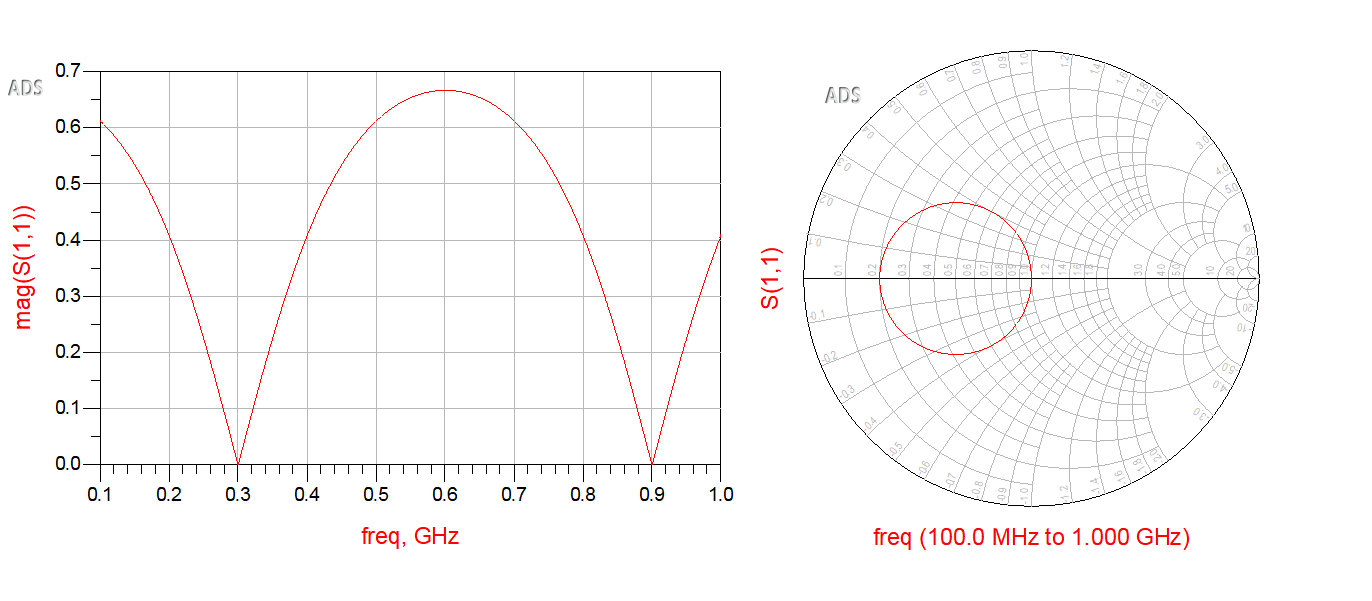

a. When you plot the $S_{11}$ for the quarter-wave transformer matching network, you should see additional frequencies at which the load is matched to the source. Why is that happening?